In [1]:
import os
import sys
import math
import time
import gzip
import random

import numpy as np
import pandas as pd
pd.set_option("display.max_columns",50)

import matplotlib.pyplot as plt
import seaborn as sns
PATH='~/Dropbox/cooperative/crystallinePolymer/data'

## サンプル情報 ##
結晶化温度：CrystTemp  
結晶化時間：CrystTime  
核材の量：NucConc  
急冷(一度0℃に急冷)：Cooling   **<font color="Red">(<\=なんか意味あったっけ？)**

In [2]:
sample_list = pd.read_csv(os.path.join(PATH, 'SampleInfo.csv'), index_col=0, dtype={'CrystTemp': int, 'CrysTime': int, 'Cooling': bool})
sample_list.T

SampleNo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
CrystTemp,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,75,75,75,75,75,75,75,75,75,...,105,105,105,105,105,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,0,0,0,0
CrysTime,5,5,5,5,10,10,10,10,20,20,20,20,40,40,40,40,5,5,5,5,10,10,10,10,20,...,20,40,40,40,40,5,5,5,5,10,10,10,10,20,20,20,20,40,40,40,40,0,0,0,0
NucConc,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,...,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5,0,0.167,0.5,1.5
Cooling,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


## 生分解性 ##

In [3]:
enzyme = pd.read_csv(os.path.join(PATH, 'enzyme','1.csv'), index_col=0)
enzyme.T

SampleNo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
day2,0.009486,0.016526,0.020300,0.007104,0.016096,0.008505,0.016971,0.019547,0.014096,0.016079,0.013773,-0.003082,0.018658,0.011538,0.014016,0.017592,0.020542,0.028050,0.024819,0.037963,0.024847,0.038190,0.015943,0.021287,0.024410,...,0.001239,-0.005457,-0.000853,0.009603,0.015020,0.002590,0.011522,0.026140,0.001692,-0.001263,0.004088,0.007829,0.000851,-0.005275,-0.003234,-0.012626,-0.009036,-0.004527,0.002983,-0.002183,-0.002772,0.024576,0.054974,0.023203,0.039433
day4,0.053755,0.040306,0.030891,0.035102,0.040033,0.030782,0.037424,0.043980,0.038763,0.037517,0.032464,0.039190,0.040871,0.043269,0.014016,0.035575,0.060752,0.082814,0.061823,0.092593,0.056670,0.081777,0.046944,0.072848,0.113914,...,0.026435,0.015007,0.022184,0.030554,0.026855,0.013811,0.021603,0.050743,0.009306,0.010943,0.015536,0.018269,0.006806,0.015824,0.010105,0.007155,0.017642,0.006338,0.006391,0.003057,0.010693,0.072881,0.100785,0.066879,0.083739
day6,0.090909,0.059250,0.043689,0.049310,0.064383,0.053868,0.055701,0.064416,0.059123,0.068781,0.049680,0.069133,0.055531,0.060096,0.030933,0.047303,0.093531,0.128673,0.101083,0.126852,0.083261,0.118306,0.075731,0.103595,0.165175,...,0.046262,0.028649,0.032423,0.040157,0.039599,0.033233,0.037446,0.074833,0.030034,0.026094,0.027800,0.039147,0.031051,0.031209,0.024252,0.029882,0.037866,0.021729,0.026843,0.027511,0.009505,0.106356,0.136562,0.095086,0.122729


**とりあえず単調増加してるか確認**  (SampleNo 24のday4がおかしい)   

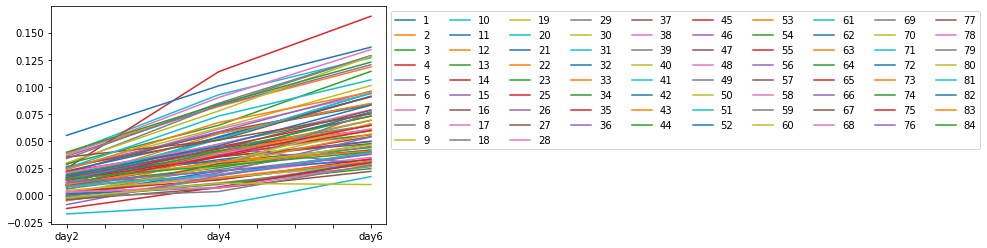

In [4]:
enzyme.drop([24]).T.plot()
plt.legend(ncol=10,bbox_to_anchor=(1,1))

In [5]:
#単調増加じゃないのもある？
enzyme[((enzyme['day2']>enzyme['day4'])|(enzyme['day4']>enzyme['day6']))]

,day2,day4,day6
SampleNo,,,
46,0.014104,0.044664,0.027268
80,-0.002772,0.010693,0.009505


大体が単調増加なので解析にはday6を使用して問題なさそう

## 温度、時間、核材と生分解性との関係をみてみる ##


まずは色々なパターンでプロット

In [7]:
#核材 NucConcの0.167が浮動小数点の問題で 0.166999...となってしまう
sample_list['NucConc']==0.167
sample_list['NucConc'].round(3)==0.167

sample_list['NucConc'] = sample_list['NucConc'].round(3)

     CrystTemp  CrysTime  NucConc  Cooling  SampleNo   day    enzyme
16          75         5    0.000    False        17  day2  0.020542
100         75         5    0.000    False        17  day4  0.060752
184         75         5    0.000    False        17  day6  0.093531
17          75         5    0.167    False        18  day2  0.028050
101         75         5    0.167    False        18  day4  0.082814
..         ...       ...      ...      ...       ...   ...       ...
162        120        40    0.500    False        79  day4  0.003057
246        120        40    0.500    False        79  day6  0.027511
79         120        40    1.500    False        80  day2 -0.002772
163        120        40    1.500    False        80  day4  0.010693
247        120        40    1.500    False        80  day6  0.009505

[192 rows x 7 columns]


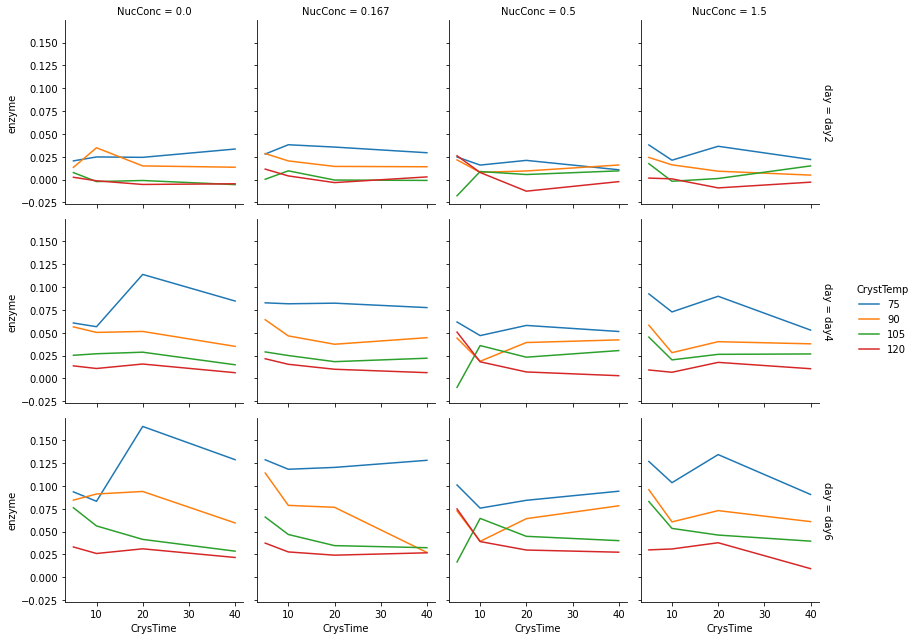

In [8]:
enzyme.reset_index().melt(id_vars='SampleNo', var_name='day', value_name="enzyme")
sample_enzyme =\
pd.merge(sample_list.query('SampleNo>16 & SampleNo<81'),
         enzyme.reset_index().melt(id_vars='SampleNo', var_name='day', value_name="enzyme"),
             how="left", left_index=True, right_on="SampleNo")
print(sample_enzyme)

# x=温度　色=時間　facet=核材
grid = sns.FacetGrid(data=sample_enzyme, col='NucConc', row='day', hue ='CrystTemp',margin_titles=True)
grid.map(sns.lineplot, 'CrysTime', 'enzyme').add_legend()

**生分解性に影響の強い成形プロセスは？**

In [9]:
#線形回帰のP valueを計算 (回帰直線の傾きを premutation test)
from sklearn import linear_model
#結晶化温度
temp = sample_enzyme.query('day=="day2"')[['CrystTemp']].values
lm_tempd2 = linear_model.LinearRegression()
lm_tempd2.fit(temp, sample_enzyme.query('day=="day2"')['enzyme'].values)
lm_tempd4 = linear_model.LinearRegression()
lm_tempd4.fit(temp, sample_enzyme.query('day=="day4"')['enzyme'].values)
lm_tempd6 = linear_model.LinearRegression()
lm_tempd6.fit(temp, sample_enzyme.query('day=="day6"')['enzyme'].values)
tempp2, tempp4, tempp6 = 0, 0, 0

for t in range(1,10000):
    print("now "+str(t)+" times") if t%1000==1 else 0
    rand_temp=np.random.permutation(sample_enzyme.query('day=="day2"')[['CrystTemp']].values)
    rand_tempd2=linear_model.LinearRegression()
    rand_tempd2.fit(rand_temp, sample_enzyme.query('day=="day2"')['enzyme'].values)
    tempp2+=1 if (lm_tempd2.coef_[0] > rand_tempd2.coef_[0]) else 0
    rand_tempd4 = linear_model.LinearRegression()
    rand_tempd4.fit(rand_temp, sample_enzyme.query('day=="day4"')['enzyme'].values)
    tempp4+=1 if (lm_tempd4.coef_[0] > rand_tempd4.coef_[0]) else 0
    rand_tempd6 = linear_model.LinearRegression()
    rand_tempd6.fit(rand_temp, sample_enzyme.query('day=="day6"')['enzyme'].values)
    tempp6+=1 if (lm_tempd6.coef_[0] > rand_tempd6.coef_[0]) else 0

print(tempp2/10000, tempp4/10000, tempp6/10000)

now 1 times
now 1001 times
now 2001 times
now 3001 times
now 4001 times
now 5001 times
now 6001 times
now 7001 times
now 8001 times
now 9001 times
0.0 0.0 0.0


In [10]:
#結晶化時間
time = sample_enzyme.query('day=="day2"')[['CrysTime']].values
lm_timed2 = linear_model.LinearRegression()
lm_timed2.fit(time, sample_enzyme.query('day=="day2"')['enzyme'].values)
lm_timed4 = linear_model.LinearRegression()
lm_timed4.fit(time, sample_enzyme.query('day=="day4"')['enzyme'].values)
lm_timed6 = linear_model.LinearRegression()
lm_timed6.fit(time, sample_enzyme.query('day=="day6"')['enzyme'].values)
timep2, timep4, timep6 = 0, 0, 0

for t in range(1,10000):
    print("now "+str(t)+" times") if t%1000==1 else 0
    rand_time=np.random.permutation(sample_enzyme.query('day=="day2"')[['CrysTime']].values)
    rand_timed2=linear_model.LinearRegression()
    rand_timed2.fit(rand_time, sample_enzyme.query('day=="day2"')['enzyme'].values)
    timep2+=1 if (lm_timed2.coef_[0] > rand_timed2.coef_[0]) else 0
    rand_timed4 = linear_model.LinearRegression()
    rand_timed4.fit(rand_time, sample_enzyme.query('day=="day4"')['enzyme'].values)
    timep4+=1 if (lm_timed4.coef_[0] > rand_timed4.coef_[0]) else 0
    rand_timed6 = linear_model.LinearRegression()
    rand_timed6.fit(rand_time, sample_enzyme.query('day=="day6"')['enzyme'].values)
    timep6+=1 if (lm_timed6.coef_[0] > rand_timed6.coef_[0]) else 0

print(timep2/10000, timep4/10000, timep6/10000)

now 1 times
now 1001 times
now 2001 times
now 3001 times
now 4001 times
now 5001 times
now 6001 times
now 7001 times
now 8001 times
now 9001 times
0.1184 0.2253 0.0822


In [11]:
#核材の量
nuc = sample_enzyme.query('day=="day2"')[['NucConc']].values
lm_nucd2 = linear_model.LinearRegression()
lm_nucd2.fit(nuc, sample_enzyme.query('day=="day2"')['enzyme'].values)
lm_nucd4 = linear_model.LinearRegression()
lm_nucd4.fit(nuc, sample_enzyme.query('day=="day4"')['enzyme'].values)
lm_nucd6 = linear_model.LinearRegression()
lm_nucd6.fit(nuc, sample_enzyme.query('day=="day6"')['enzyme'].values)
nucp2, nucp4, nucp6 = 0, 0, 0

for t in range(1,10000):
    print("now "+str(t)+" nucs") if t%1000==1 else 0
    rand_nuc=np.random.permutation(sample_enzyme.query('day=="day2"')[['NucConc']].values)
    rand_nucd2=linear_model.LinearRegression()
    rand_nucd2.fit(rand_nuc, sample_enzyme.query('day=="day2"')['enzyme'].values)
    nucp2+=1 if (lm_nucd2.coef_[0] > rand_nucd2.coef_[0]) else 0
    rand_nucd4 = linear_model.LinearRegression()
    rand_nucd4.fit(rand_nuc, sample_enzyme.query('day=="day4"')['enzyme'].values)
    nucp4+=1 if (lm_nucd4.coef_[0] > rand_nucd4.coef_[0]) else 0
    rand_nucd6 = linear_model.LinearRegression()
    rand_nucd6.fit(rand_nuc, sample_enzyme.query('day=="day6"')['enzyme'].values)
    nucp6+=1 if (lm_nucd6.coef_[0] > rand_nucd6.coef_[0]) else 0

print(nucp2/10000, nucp4/10000, nucp6/10000)

now 1 nucs
now 1001 nucs
now 2001 nucs
now 3001 nucs
now 4001 nucs
now 5001 nucs
now 6001 nucs
now 7001 nucs
now 8001 nucs
now 9001 nucs
0.5018 0.4542 0.4576


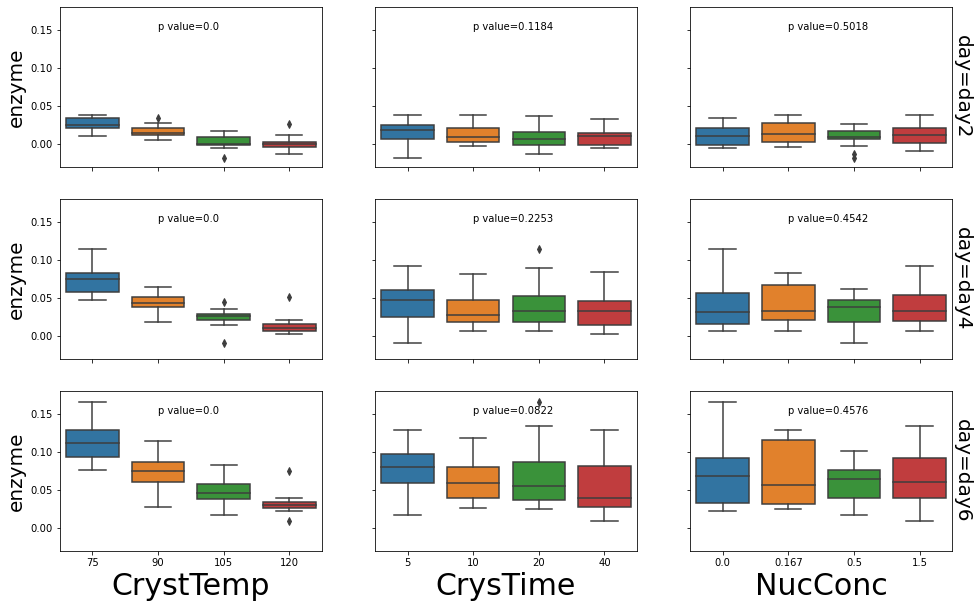

In [12]:
fig, axs =plt.subplots(nrows=3, ncols=3,figsize=(16, 10))
#結晶化温度 CrystTemp
sns.boxplot(x='CrystTemp', y='enzyme', data=sample_enzyme.query('day=="day2"'), ax=axs[0,0])
sns.boxplot(x='CrystTemp', y='enzyme', data=sample_enzyme.query('day=="day4"'), ax=axs[1,0])
sns.boxplot(x='CrystTemp', y='enzyme', data=sample_enzyme.query('day=="day6"'), ax=axs[2,0])
#結晶化時間 CrysTime
sns.boxplot(x='CrysTime', y='enzyme', data=sample_enzyme.query('day=="day2"'), ax=axs[0,1])
sns.boxplot(x='CrysTime', y='enzyme', data=sample_enzyme.query('day=="day4"'), ax=axs[1,1])
sns.boxplot(x='CrysTime', y='enzyme', data=sample_enzyme.query('day=="day6"'), ax=axs[2,1])
#核材の量 NucConc
sns.boxplot(x='NucConc', y='enzyme', data=sample_enzyme.query('day=="day2"'), ax=axs[0,2])
sns.boxplot(x='NucConc', y='enzyme', data=sample_enzyme.query('day=="day4"'), ax=axs[1,2])
sns.boxplot(x='NucConc', y='enzyme', data=sample_enzyme.query('day=="day6"'), ax=axs[2,2])

for row in [0,1,2] : 
    for col in [0,1,2] : 
        axs[row,col].set_ylim(-0.03, 0.18)
        axs[row,col].xaxis.label.set_size(fontsize=30)
        axs[row,col].yaxis.label.set_size(fontsize=20)



for row in [0,1,2] :
        for col in [1,2] :
                axs[row,col].yaxis.set_ticklabels([])
                axs[row,col].set_ylabel('')

for col in [0,1,2] :
        for row in [0,1] :
                axs[row,col].xaxis.set_ticklabels([])
                axs[row,col].set_xlabel('')

axs[0,2].set_ylabel('day=day2',rotation=-90)
axs[0,2].yaxis.set_label_coords(1,0.5)
axs[1,2].set_ylabel('day=day4',rotation=-90)
axs[1,2].yaxis.set_label_coords(1,0.5)
axs[2,2].set_ylabel('day=day6',rotation=-90)
axs[2,2].yaxis.set_label_coords(1,0.5)

#p value
p_value=[tempp2,tempp4,tempp6,timep2,timep4,timep6,nucp2,nucp4,nucp6]
for col in [0,1,2] :
        for row in [0,1,2] :
            p=p_value[col*3+row]
            axs[row,col].text(1,0.15,'p value='+str(p/10000))
            
#色は変えるべきかも...